## Getting Started
### Data Exploration and Analysis

In [20]:
import pandas as pd
from pandasgui import show
import matplotlib.pyplot as plt

prs = pd.read_excel('PIRUS_V4.xlsx', index_col=0)

In [2]:
prs.shape

(3203, 129)

In [6]:
prs.describe

<bound method NDFrame.describe of                  Loc_Plot_State1 Loc_Plot_City1 Loc_Plot_State2  \
Subject_ID                                                        
1000                    Illinois        Chicago         Florida   
1001                  California  San Francisco             NaN   
1002                  California      Santa Ana             NaN   
1005                    New York       New York             NaN   
1006                    New York       New York             NaN   
...                          ...            ...             ...   
12147       District of Columbia     Washington             NaN   
12148       District of Columbia     Washington             NaN   
12149                     Oregon          Salem             NaN   
12151                     Oregon          Salem             NaN   
12152       District of Columbia     Washington             NaN   

            Loc_Plot_City2  Year_Exposure  Plot_Target1  Plot_Target2  \
Subject_ID           

In [21]:
prs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 1000 to 12152
Columns: 129 entries, Loc_Plot_State1 to Closeness_Centrality
dtypes: float64(31), int64(76), object(22)
memory usage: 3.2+ MB


### Data Cleaning

In [23]:
# Filter for white nationalists and christian nationalist ideologies 
values = [2, 5]

# Drop any rows with missing 'Ideological_Sub_Category1' values
prs = prs.dropna(subset=['Ideological_Sub_Category1'])

# Filter the dataframe
nats = prs[prs['Ideological_Sub_Category1'].isin(values)]

In [24]:
nats.shape

(825, 129)

In [32]:
show(nats)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


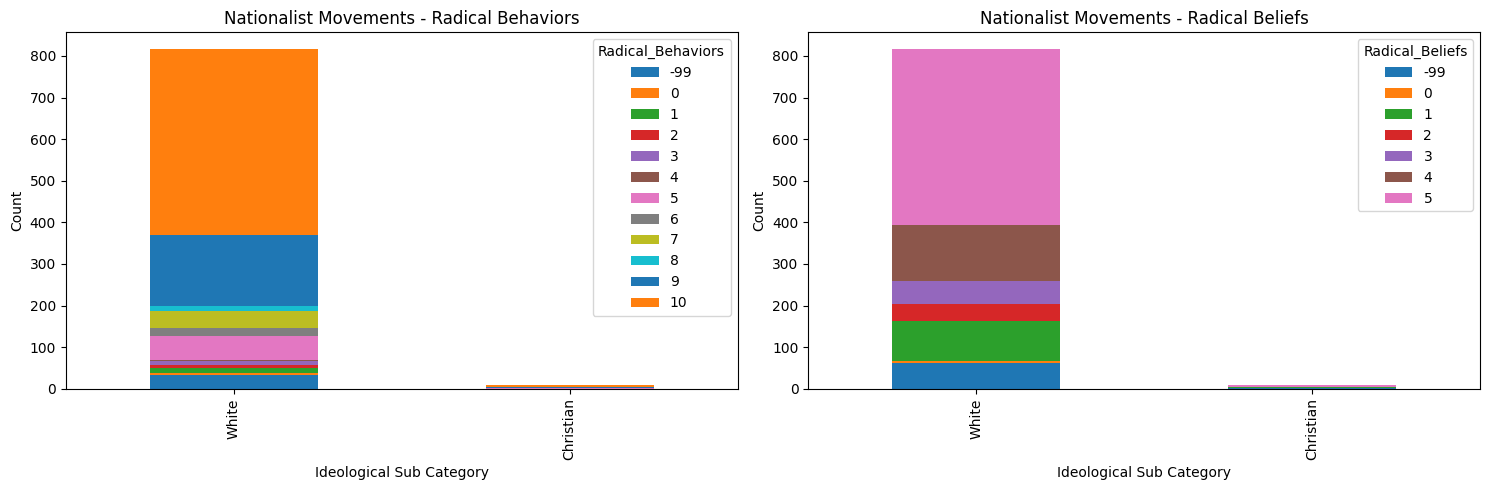

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Group by "Ideological_Sub_Category1" and "Radical_Behaviors"
grouped_behaviors = nats.groupby(["Ideological_Sub_Category1", "Radical_Behaviors"]).size()

# Unstack the grouped dataframe
unstacked_behaviors = grouped_behaviors.unstack(level=-1)

# Plot the unstacked dataframe
unstacked_behaviors.plot(kind='bar', stacked=True, ax=axs[0])

axs[0].set_xlabel('Ideological Sub Category')
axs[0].set_ylabel('Count')
axs[0].set_title('Nationalist Movements - Radical Behaviors')

# Replace the x-axis labels
axs[0].set_xticklabels(['White' if label.get_text() == '2' else 'Christian' for label in axs[0].get_xticklabels()])

# Group by "Ideological_Sub_Category1" and "Radical_Beliefs"
grouped_beliefs = nats.groupby(["Ideological_Sub_Category1", "Radical_Beliefs"]).size()

# Unstack the grouped dataframe
unstacked_beliefs = grouped_beliefs.unstack(level=-1)

# Plot the unstacked dataframe
unstacked_beliefs.plot(kind='bar', stacked=True, ax=axs[1])

axs[1].set_xlabel('Ideological Sub Category')
axs[1].set_ylabel('Count')
axs[1].set_title('Nationalist Movements - Radical Beliefs')

# Replace the x-axis labels
axs[1].set_xticklabels(['White' if label.get_text() == '2' else 'Christian' for label in axs[1].get_xticklabels()])

plt.tight_layout()
plt.show()